In [1]:
import sys
sys.path.insert(0, '../src/data')
sys.path.insert(0, '../src/features')
sys.path.insert(0, '../src/models')
sys.path.insert(0, '../src/visualization')

from data_manager import DataManager
from pretreatment import load_raw_data, save_raw_data, create_superclasses
from constants import Constants

from ada_boost import AdaBoost
from decision_tree import DecisionTree
from k_means import KMeans
from svm import Svm
from neural_network import NeuralNetwork
from perceptron import Perceptron

from visualize import Visualize

## Prétraitement des données

In [2]:
raw_path = '../data/raw/train.csv'
superclasses_path = '../data/processed/superclasses.csv'

### Superclasses

In [3]:
# superclasses = create_superclasses(raw_path, superclasses_path)

## Chargement des données

In [4]:
path = raw_path
# path = superclasses_path

In [5]:
dataManager = DataManager(path=path)

constants, x_train, x_test, t_train, t_test = dataManager.load_data()
# constants.print()
t_train_onehot = dataManager.one_hot_encoding(t_train)
t_test_onehot = dataManager.one_hot_encoding(t_test)

print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"t_train.shape: {t_train.shape}")
print(f"t_test.shape: {t_test.shape}")


x_train.shape: (792, 192)
x_test.shape: (198, 192)
t_train.shape: (792,)
t_test.shape: (198,)


## Préparation du modèle

### Perceptron

In [ ]:
model = Perceptron(constants)
hyperparameters_choices = {
	"alpha": [0.1, 0.2, 0.01],
	"max_iter": [100, 200, 300],
}

### Réseau de neurones

In [6]:
model = NeuralNetwork(constants)
# hyperparameters_choices = {
# 	"alpha": [1e-5],
# 	"max_iter": [300],
# 	"batch_size": [32, "auto"],
# 	"hidden_layer_sizes" : [(100,1), (75, 2), (50, 3)]
# }
hyperparameters_choices = {
	"alpha": [1e-4],
	"max_iter": [500],
	"batch_size": ["auto"],
	"hidden_layer_sizes" : [(100,)]
}

### Adaboost

In [ ]:
model = AdaBoost(constants)
hyperparameters_choices = {
	# TODO: add hyperparameters
}

### SVM

In [6]:
model = Svm(constants)
hyperparameters_choices = {		# SVM doesn't have hyperparameters in the traditional sense, but we can optimize C (regularization parameter)
	"C": [1, 10, 100, 1000]
}

### Arbre de décision

In [13]:
model = DecisionTree(constants)
hyperparameters_choices = {
	# TODO: add hyperparameters
}

### K-means

In [6]:
model = KMeans(constants)
hyperparameters_choices = {		# KMeans doesn't have hyperparameters like SVM, but we can optimize the number of clusters (k)
	'n_clusters': [2, 3, 4, 5]
}

## Apprentissage du modèle

In [7]:
hyperparameters = model.get_alea_hyperparameters(x_train, t_train, hyperparameters_choices)
print(hyperparameters)

{'n_clusters': 2}


In [8]:
# hyperparameters = model.find_optimal_hyperparameters(x_train, t_train, hyperparameters_choices)
# print(f"hyperparameters: {hyperparameters}")

In [8]:
model.train(x_train, t_train, hyperparameters)

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Tests et visualisation

In [9]:
print(model.model.score(x_train, t_train))

-60.074652033524046


In [10]:
t_pred = model.predict(x_test)

In [11]:
visualize = Visualize(constants, t_pred, t_test)

In [12]:
# visualize.print_labels_scores()
visualize.print_mean_scores()

Accuracy       = 0.010
Mean precision = 0.010
Mean recall    = 0.000
Mean F1 score  = 0.000


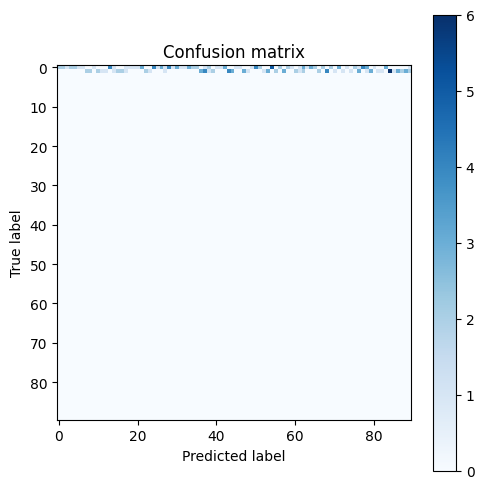

In [13]:
visualize.plot_confusion_matrix(show_label=False)